# Cardio Good Fitness

In [273]:
# Importing relevant libraries
import pandas as pd
import numpy as np

In [274]:
# Reading in the CSV file
cardio_df = pd.read_csv('CardioGoodFitness.csv')
df = cardio_df.copy()
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## Exploratory Data Analysis

In [275]:
df.shape

(180, 9)

- The data set has 180 rows and 9 columns

In [276]:
df.duplicated().sum()

0

- There are no duplicated values in the data set

In [277]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- There are no null values in the data set

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- All data types are casted appropriately

In [279]:
# Checking for empty values as they do not appear as null values
for i in df.columns:
    print(f'{i}:\n')
    print(f'{df[i].unique()}')
    print('_' * 80)

Product:

['TM195' 'TM498' 'TM798']
________________________________________________________________________________
Age:

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
________________________________________________________________________________
Gender:

['Male' 'Female']
________________________________________________________________________________
Education:

[14 15 12 13 16 18 20 21]
________________________________________________________________________________
MaritalStatus:

['Single' 'Partnered']
________________________________________________________________________________
Usage:

[3 2 4 5 6 7]
________________________________________________________________________________
Fitness:

[4 3 2 1 5]
________________________________________________________________________________
Income:

[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302 

- No empty values in the data set

In [280]:
# Statistical summary of the numerical values in the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


## Data Visualisation

### Univariate Data Analysis

In [281]:
# importing relevant libraries
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [282]:
# Function for univariate plots
def univariate_plot(var, plot_type = sns.countplot):
    plt.figure(figsize=(10, 5))
    plot_type(data=df, x=var)
    plt.xticks(rotation = 90)
    plt.title(f'{var} Distribution');   

In [283]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Product

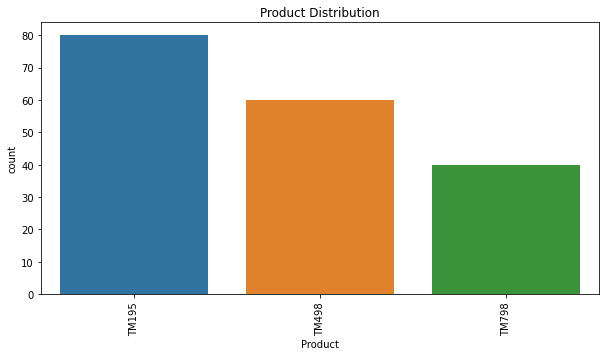

In [284]:
univariate_plot('Product')

- The TM195 treadmill is the most purchased product, followed by the TM498, then the TM798

### Age

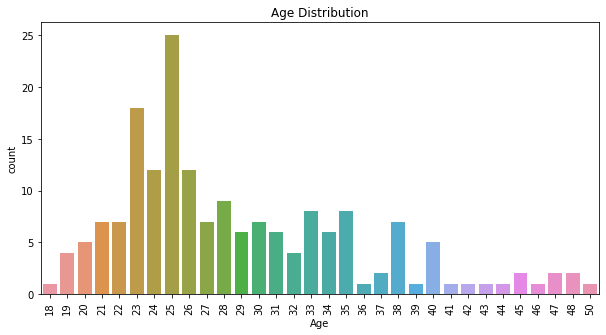

In [285]:
univariate_plot('Age')

- Many of the users are 25 years old.  
- Many customers are between 23 and 26 years. This points out that the company's products are popular among young people in their 20s.

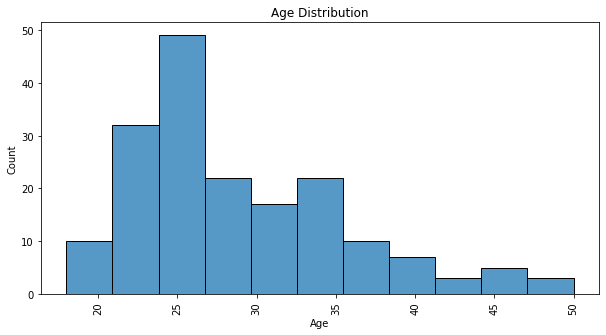

In [286]:
univariate_plot('Age', sns.histplot)

- The distribution is right skewed

### Gender

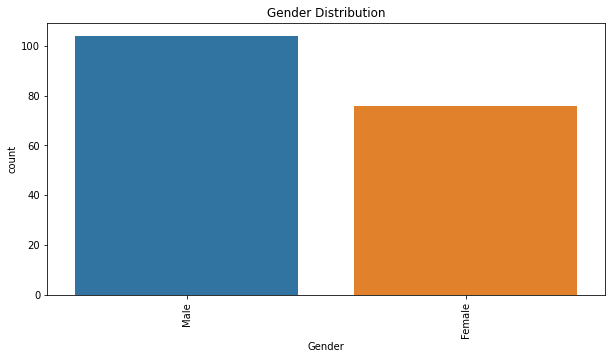

In [287]:
univariate_plot('Gender')

- Males purchase the product more than females

### Education

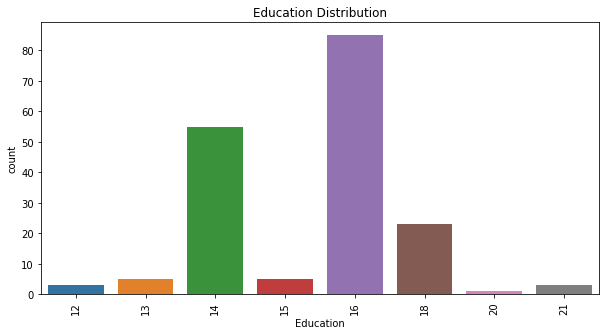

In [288]:
univariate_plot('Education')

- Most customers' education level is 16, followed by 14 and then 18

### Marital Status

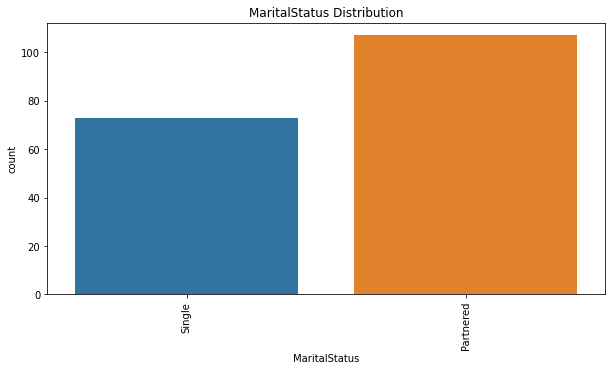

In [289]:
univariate_plot('MaritalStatus')

- Most customers are in relationships

### Usage

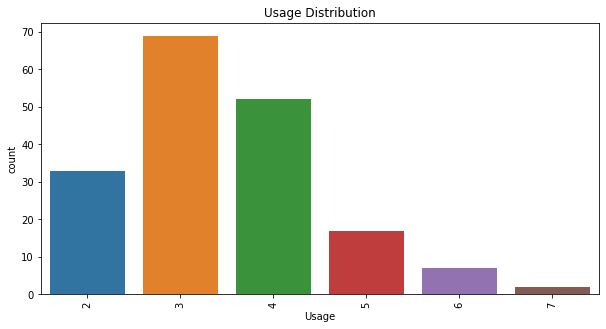

In [290]:
univariate_plot('Usage')

- Most users use the product 2 - 4 times a week. The highest being 3 times a week

### Fitness

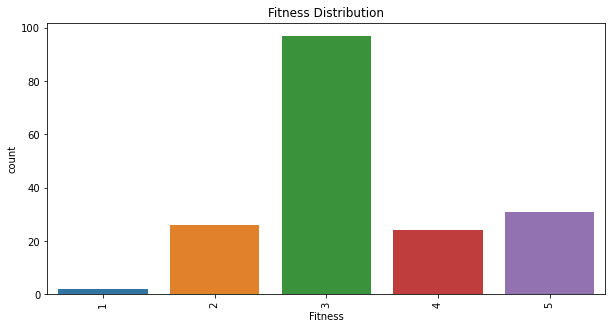

In [291]:
univariate_plot('Fitness')

- Most dominant fitness level is 3

### Income

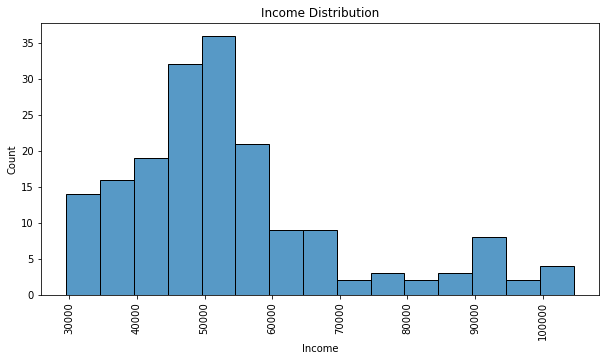

In [292]:
univariate_plot('Income', sns.histplot)

- Most users earn between 30,000 - 60,000. The distribution is right skewed

### Miles

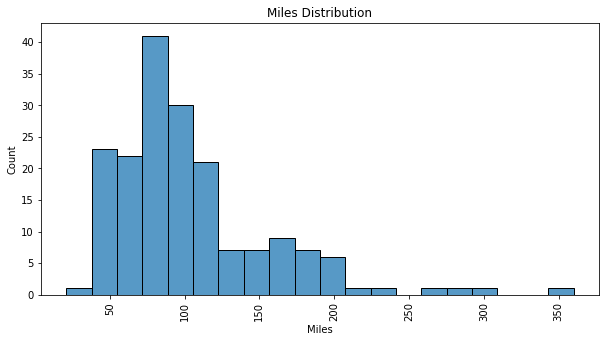

In [293]:
univariate_plot('Miles', sns.histplot)

In [294]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

- The distribution is right-skewed. Majority of users run between 66 - 114 miles

In [295]:
df['Miles'].mode()[0]

85

- Many people run 85 miles

### Multivariate Data Analysis

In [296]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Correlation

In [297]:
num_df = df.select_dtypes(exclude='object')
num_df

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [298]:
num_df_corr = num_df.corr()

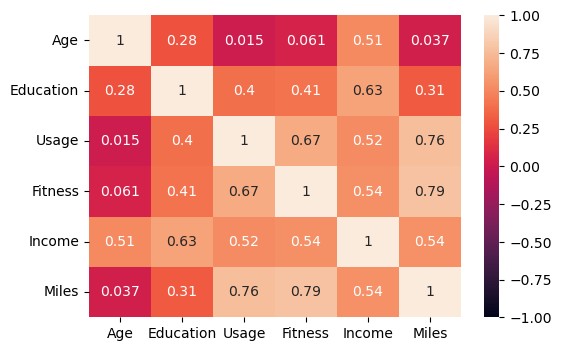

In [299]:
plt.figure(dpi=100)
sns.heatmap(data=num_df_corr, vmin=-1, vmax=1, annot=True);

- Age is moderately correlated with income
- Education is moderately correlated with Income
- Usage is moderately correlated with Fitness, Income and Miles
- Fitness is moderately correlated with Miles

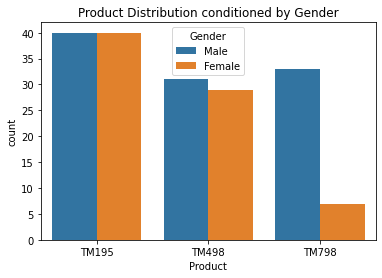

In [300]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product Distribution conditioned by Gender');

- The TM195 treadmill is equally popular among males and females
- Among the TM498 treadmill users, males slightly prefer it over females
- The TM798 treadmill users are mostly males

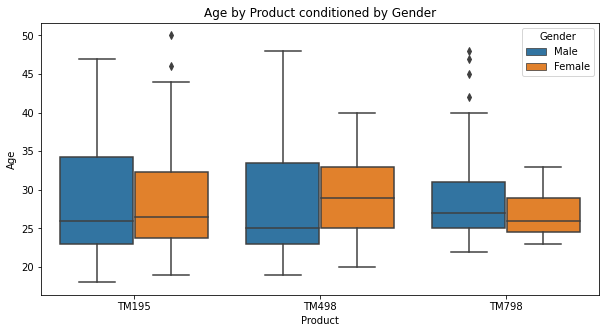

In [301]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Product', y='Age', hue='Gender')
plt.title('Age by Product conditioned by Gender');

- Most middle aged women prefer the TM195 treadmill
- Many middle aged men purchase either the TM195 or the TM498 treadmill
- Many users of the TM798 are young males and females in their mid 20s to early 30s

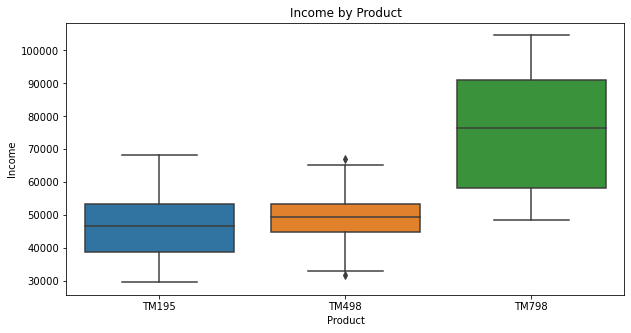

In [302]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Product', y='Income')
plt.title('Income by Product');

- The TM195 treadmill is probably the least expensive, as it is bought mostly by people with lower income levels. It could also be the reason it is the most purchased product.

- This is followed by the TM498 treadmill which costs higher than the TM195 but lower than the TM798 which is probably the most expensive treadmill.

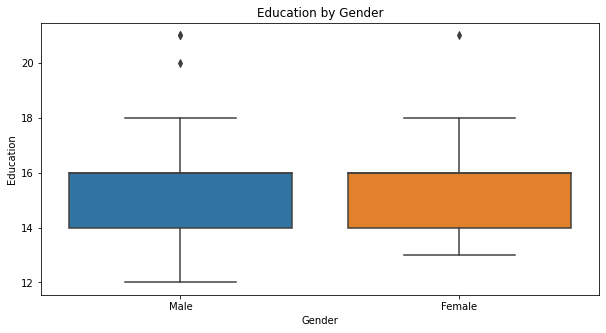

In [303]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Education')
plt.title('Education by Gender');

- Females have higher education levels than males

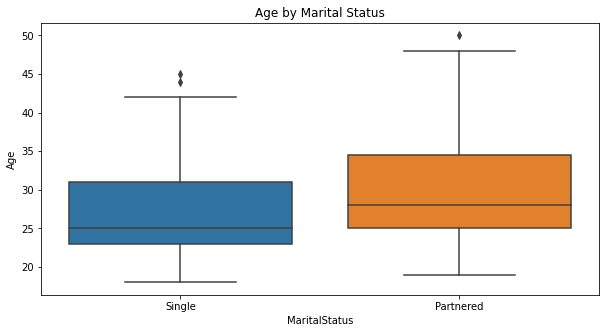

In [304]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='MaritalStatus', y='Age')
plt.title('Age by Marital Status');

- Many older people are in relationships compared to younder people who are mostly single 

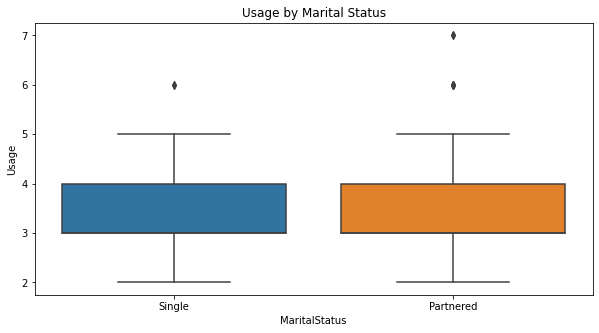

In [305]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='MaritalStatus', y='Usage')
plt.title('Usage by Marital Status');

- Usage is similar among single or partnered customers

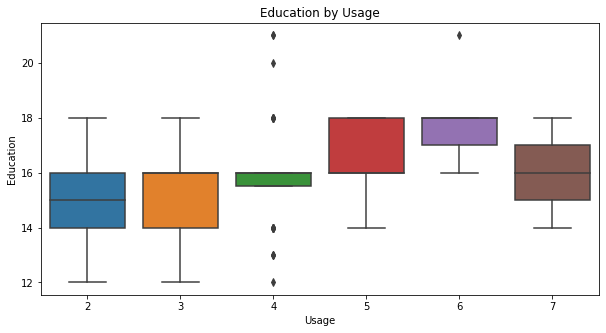

In [306]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Usage', y='Education')
plt.title('Education by Usage');

- More educated people tend to exercise more

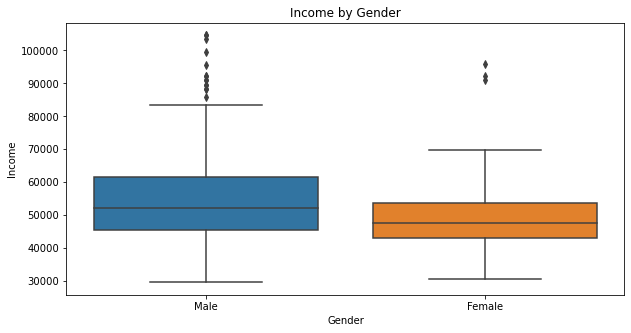

In [307]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Income')
plt.title('Income by Gender');

- Men earn more than women

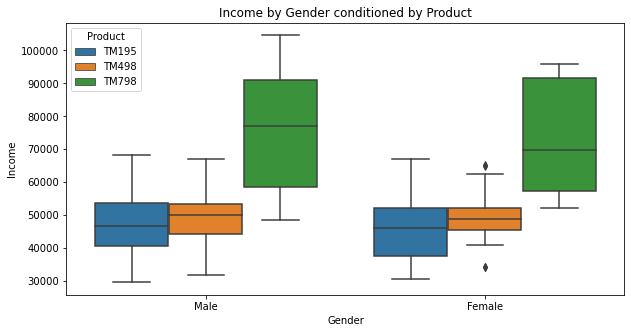

In [308]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Income', hue='Product')
plt.title('Income by Gender conditioned by Product');

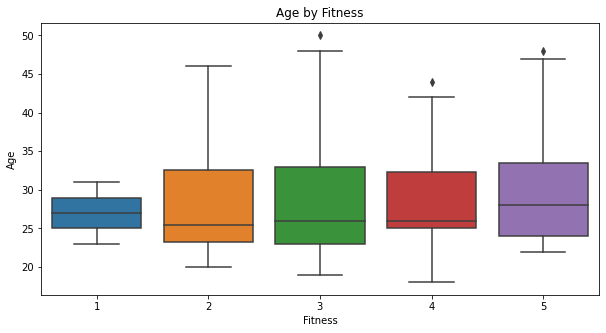

In [309]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Fitness', y='Age')
plt.title('Age by Fitness');

- Younger customers tend to be more fit than older customers. Most customers are between 3 - 4 level of fitness.

<Figure size 720x360 with 0 Axes>

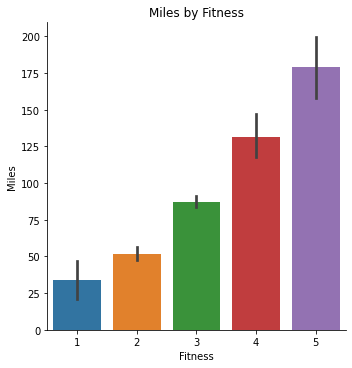

In [310]:
plt.figure(figsize=(10, 5))
sns.catplot(data=df, x='Fitness', y='Miles', kind='bar')
plt.title('Miles by Fitness');

- Customers with higher fitness levels tend to run more miles 

<Figure size 720x360 with 0 Axes>

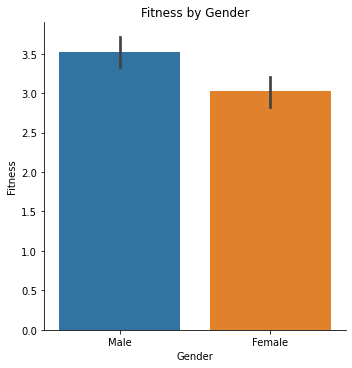

In [311]:
plt.figure(figsize=(10, 5))
sns.catplot(data=df, x='Gender', y='Fitness', kind='bar')
plt.title('Fitness by Gender');

- Males tend to be more fit than females

<Figure size 720x360 with 0 Axes>

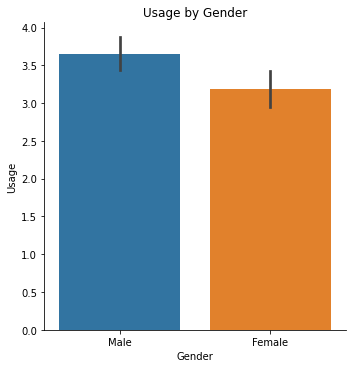

In [312]:
plt.figure(figsize=(10, 5))
sns.catplot(data=df, x='Gender', y='Usage', kind='bar')
plt.title('Usage by Gender');

- Males use the products more than females

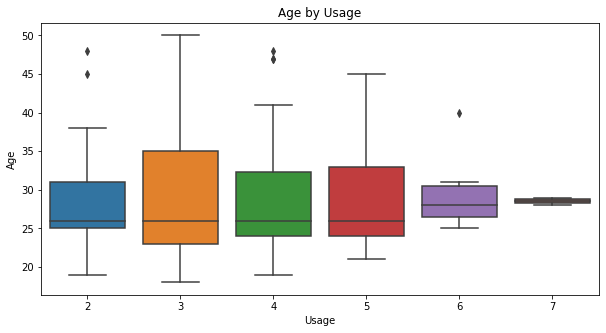

In [313]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Usage', y='Age')
plt.title('Age by Usage');

- Younger people tend to use the treadmill more times than older people. Most people use it 3 times a week 

### Recommendations

- The TM195 treadmill is the most popular treadmill probably due to the fact that it is the least expensive. It is equally popular among males and females. The target market for this product should be low earners who are young and/or just starting out their fitness journey. The low price would motivate purchase among this group of persons compared to the more expensive treadmill brands.

- The TM498 and TM798 brands should be targeted at higher earning customers, espcially males, as they have a higher fitness level and usage than females and they generally earn more than females. These products, especially the TM798 brand, could be marketed as status products to encourage 'snob purchase' among the affluent customers.

- All products should be targeted mostly at educated customers. It was observed that usage is higher among educted customers